best_x is  [9.51966193e-01 1.82547294e-04] best_y is [2.57992943]


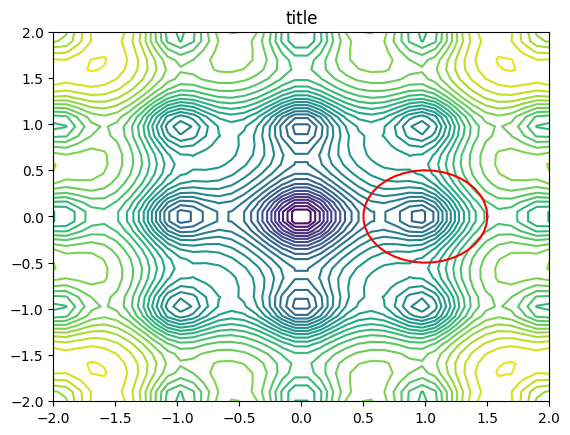

In [1]:
import numpy as np
from sko.PSO import PSO


def demo_func(x):
    x1, x2 = x
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x1 ** 2 + x2 ** 2))) - np.exp(
        0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))) + 20 + np.e


constraint_ueq = (
    lambda x: (x[0] - 1) ** 2 + (x[1] - 0) ** 2 - 0.5 ** 2
    ,
)

max_iter = 50
pso = PSO(func=demo_func, n_dim=2, pop=40, max_iter=max_iter, lb=[-2, -2], ub=[2, 2]
          , constraint_ueq=constraint_ueq)
pso.record_mode = True
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

# %% Now Plot the animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

record_value = pso.record_value
X_list, V_list = record_value['X'], record_value['V']

fig, ax = plt.subplots(1, 1)
ax.set_title('title', loc='center')
line = ax.plot([], [], 'b.')

X_grid, Y_grid = np.meshgrid(np.linspace(-2.0, 2.0, 40), np.linspace(-2.0, 2.0, 40))
Z_grid = demo_func((X_grid, Y_grid))
ax.contour(X_grid, Y_grid, Z_grid, 30)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

t = np.linspace(0, 2 * np.pi, 40)
ax.plot(0.5 * np.cos(t) + 1, 0.5 * np.sin(t), color='r')

plt.ion()
p = plt.show()


def update_scatter(frame):
    i, j = frame // 10, frame % 10
    ax.set_title('iter = ' + str(i))
    X_tmp = X_list[i] + V_list[i] * j / 10.0
    plt.setp(line, 'xdata', X_tmp[:, 0], 'ydata', X_tmp[:, 1])
    return line


ani = FuncAnimation(fig, update_scatter, blit=True, interval=25, frames=max_iter * 10)
plt.show()

ani.save('pso.gif', writer='pillow')

[39 41 24  3 15 25 17  2 48 45 31 13 19 12 30 22 40 27 33 42 47 10 32 35
 34  0 21  6  4 36 37  7 26 11 38 43 16 18 46  5  9 28  1 29 23 14 20 44
 49  8] 648504.4587954859 648504.4587954859


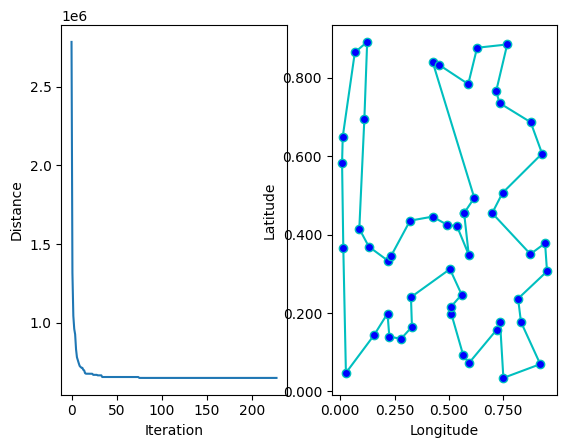

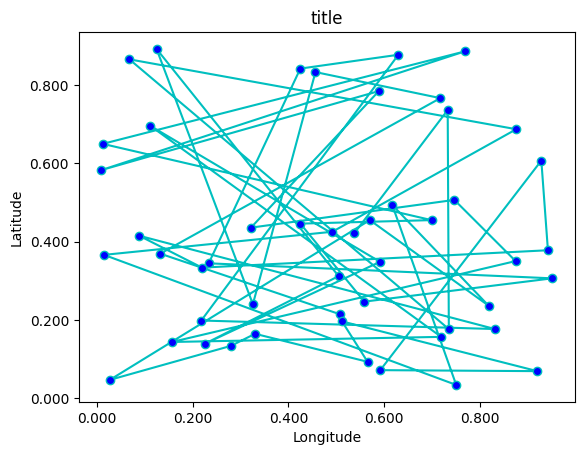

In [3]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import sys

num_points = 50

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
num_points = points_coordinate.shape[0]
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
distance_matrix = distance_matrix * 111000  # 1 degree of lat/lon ~ = 111000m


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


# %%
from sko.SA import SA_TSP

sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=100, T_min=1, L=10 * num_points)

best_points, best_distance = sa_tsp.run()
print(best_points, best_distance, cal_total_distance(best_points))
# %% Plot the best routine
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 2)

best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(sa_tsp.best_y_history)
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Distance")
ax[1].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
plt.show()

# %% Plot the animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

best_x_history = sa_tsp.best_x_history

fig2, ax2 = plt.subplots(1, 1)
ax2.set_title('title', loc='center')
line = ax2.plot(points_coordinate[:, 0], points_coordinate[:, 1],
                marker='o', markerfacecolor='b', color='c', linestyle='-')
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
plt.ion()
p = plt.show()


def update_scatter(frame):
    ax2.set_title('iter = ' + str(frame))
    points = best_x_history[frame]
    points = np.concatenate([points, [points[0]]])
    point_coordinate = points_coordinate[points, :]
    plt.setp(line, 'xdata', point_coordinate[:, 0], 'ydata', point_coordinate[:, 1])
    return line


ani = FuncAnimation(fig2, update_scatter, blit=True, interval=25, frames=len(best_x_history))
plt.show()

ani.save('sa_tsp.gif', writer='pillow')

best_x: [ 0.93360083 -0.0612649  -0.98437051  0.27416942] 
 best_y: [0.2066883]


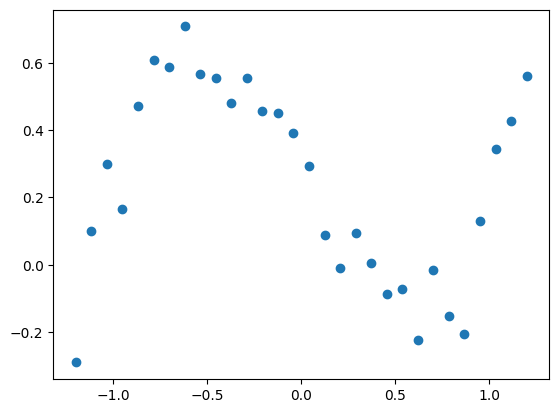

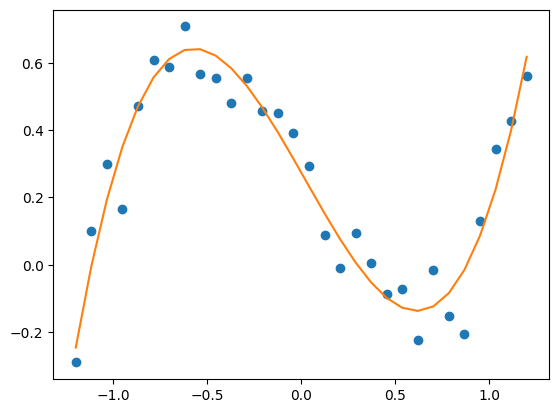

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sko.GA import GA

x_true = np.linspace(-1.2, 1.2, 30)
y_true = x_true ** 3 - x_true + 0.4 * np.random.rand(30)
plt.plot(x_true, y_true, 'o')
def f_fun(x, a, b, c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d


def obj_fun(p):
    a, b, c, d = p
    residuals = np.square(f_fun(x_true, a, b, c, d) - y_true).sum()
    return residuals

ga = GA(func=obj_fun, n_dim=4, size_pop=100, max_iter=500,
        lb=[-2] * 4, ub=[2] * 4)

best_params, residuals = ga.run()
print('best_x:', best_params, '\n', 'best_y:', residuals)

y_predict = f_fun(x_true, *best_params)

fig, ax = plt.subplots()

ax.plot(x_true, y_true, 'o')
ax.plot(x_true, y_predict, '-')

plt.show()

In [6]:
from mealpy.bio_based import BBO, EOA, IWO, SBO, SMA, TPO, VCS, WHO
from mealpy.evolutionary_based import CRO, DE, EP, ES, FPA, GA, MA
from mealpy.human_based import BRO, BSO, CA, CHIO, FBIO, GSKA, ICA, LCO, QSA, SARO, SSDO, TLO
from mealpy.math_based import AOA, CEM, CGO, GBO, HC, PSS, SCA
from mealpy.music_based import HS
from mealpy.physics_based import ArchOA, ASO, EFO, EO, HGSO, MVO, NRO, SA, TWO, WDO
from mealpy.system_based import AEO, GCO, WCA
from mealpy.swarm_based import ABC, ACOR, ALO, AO, BA, BeesA, BES, BFO, BSA, COA, CSA, CSO, DO, EHO, FA, FFA, FOA, GOA, GWO, HGS
from mealpy.swarm_based import HHO, JA, MFO, MRFO, MSA, NMRA, PFA, PSO, SFO, SHO, SLO, SRSR, SSA, SSO, SSpiderA, SSpiderO, WOA
import numpy as np
# 定义函数
def fitness_function(solution):
    return np.sum(solution**2)
# 参数
problem_dict1 = {
"fit_func": fitness_function,
"lb": [-10, -15, -4, -2, -8],
"ub": [10, 15, 12, 8, 20],
"minmax": "min",
}
# PSO参数
epoch = 1000
pop_size = 50
c1 = 2.05
c2 = 2.05
w_min = 0.4
w_max = 0.9
model = PSO.OriginalPSO(epoch, pop_size, c1, c2, w_min, w_max)
best_position, best_fitness = model.solve(problem_dict1)
print(f"Solution: {best_position}, Fitness: {best_fitness}")

2023/08/23 09:38:27 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2023/08/23 09:38:27 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 1, Current best: 21.876438781556374, Global best: 21.876438781556374, Runtime: 0.00487 seconds
2023/08/23 09:38:27 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 2, Current best: 21.876438781556374, Global best: 21.876438781556374, Runtime: 0.00419 seconds
2023/08/23 09:38:27 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 3, Current best: 13.993440154760112, Global best: 13.993440154760112, Runtime: 0.00439 seconds
2023/08/23 09:38:27 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 4, Current best: 13.993440154760112, Global best: 13.993440154760112, Runtime: 0.00433 seconds
2023/08/23 09:38:27 AM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >Problem: P, Epoch: 5, Current best: 9.127775511486046, Global best: 9.127775511486046, Runtime: 

Solution: [-2.01879669e-07  6.34830659e-07 -6.45760928e-07 -2.00000000e+00
 -1.49707768e-07], Fitness: 4.000000000000883
